In [1]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()
from fastbook import *
from fastai.vision.all import *

     |████████████████████████████████| 727kB 8.1MB/s 
     |████████████████████████████████| 1.2MB 39.7MB/s 
     |████████████████████████████████| 204kB 51.7MB/s 
     |████████████████████████████████| 51kB 7.0MB/s 
     |████████████████████████████████| 61kB 9.3MB/s 
     |████████████████████████████████| 51kB 8.0MB/s 
Mounted at /content/gdrive


In [7]:
def my_func(x):
  return path/'labels'/f'{x.stem}_P{x.suffix}'

path = untar_data(URLs.CAMVID_TINY)
dls = SegmentationDataLoaders.from_label_func(path, bs=8, 
      fnames = get_image_files(path/'images'),
      label_func = my_func,
      codes = np.loadtxt(path/'codes.txt', dtype=str))

learn = unet_learner(dls, resnet34)
learn.fine_tune(10)

epoch,train_loss,valid_loss,time
0,2.851694,2.534302,00:01


epoch,train_loss,valid_loss,time
0,1.757755,1.550696,00:01
1,1.512024,1.309886,00:01
2,1.360968,1.157768,00:01
3,1.242054,1.047172,00:01
4,1.126804,0.980204,00:01
5,1.040469,0.815384,00:01
6,0.957010,0.838737,00:01
7,0.882132,0.766787,00:01
8,0.818715,0.781919,00:01
9,0.768726,0.775270,00:01


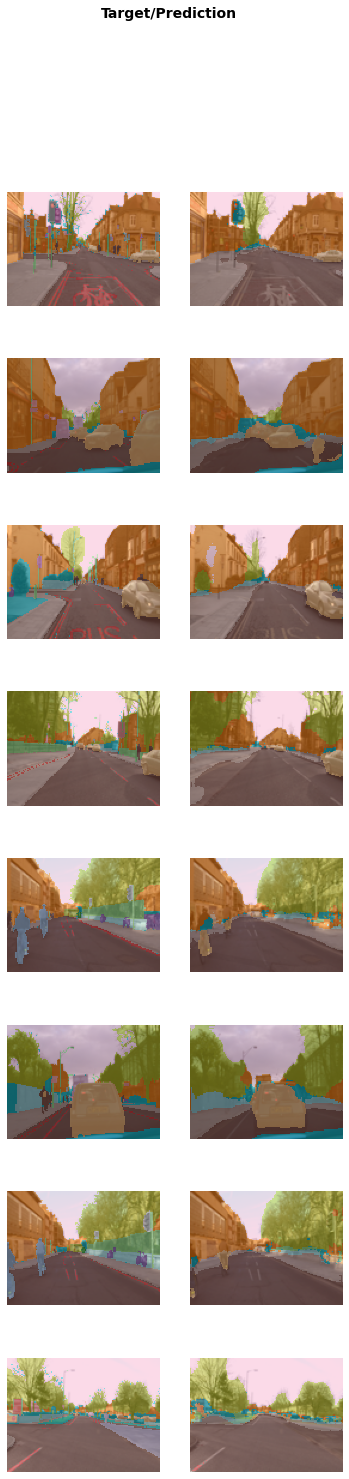

In [8]:
learn.show_results(max_n=10)

In [9]:
learn.export('segmentation')